# Test file for clip function

In [19]:
import rasterio as rio
import numpy as np
from matplotlib import pyplot
from pathlib import Path

In [20]:
output_path = Path('/home/pauliina/Downloads/eis_outputs/clip_result.tif')
# Default open mode is r
src = rio.open(output_path)
arr = src.read(1)
# Let's replace No data values with numpy NaN values in order to plot clipped raster so that the colour changes are visible for human eye
arr = np.where(arr<-100, np.nan, arr)

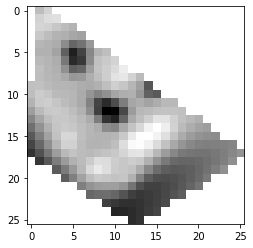

In [22]:
pyplot.imshow(arr, cmap='gray')
pyplot.show()

This is just to show one example on how you can visually check that your tool works as expected. Compare the image above with the result QGIS gives if you clip small_raster.tif with small_area.shp